SIN-392 - Introdução ao Processamento Digital de Imagens (2022-1)

# Aula 17 - Redes Neurais Artificiais - Backpropagation (Parte 1)

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bibliotecas-necessárias" data-toc-modified-id="Importando-as-bibliotecas-necessárias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bibliotecas necessárias</a></span></li><li><span><a href="#Configurações-para-reprodutibilidade" data-toc-modified-id="Configurações-para-reprodutibilidade-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Configurações para reprodutibilidade</a></span></li><li><span><a href="#Definindo-as-funções-de-ativação-e-funções-de-perda" data-toc-modified-id="Definindo-as-funções-de-ativação-e-funções-de-perda-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Definindo as funções de ativação e funções de perda</a></span></li><li><span><a href="#Implementando-o-Backpropagation" data-toc-modified-id="Implementando-o-Backpropagation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Implementando o Backpropagation</a></span><ul class="toc-item"><li><span><a href="#Inicializando-os-dados-de-entrada" data-toc-modified-id="Inicializando-os-dados-de-entrada-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Inicializando os dados de entrada</a></span></li><li><span><a href="#Obtendo-as-informações-sobre-a-rede-a-partir-dos-dados." data-toc-modified-id="Obtendo-as-informações-sobre-a-rede-a-partir-dos-dados.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Obtendo as informações sobre a rede a partir dos dados.</a></span></li><li><span><a href="#Gerando-os-pesos-aleatóriamente" data-toc-modified-id="Gerando-os-pesos-aleatóriamente-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gerando os pesos aleatóriamente</a></span></li><li><span><a href="#Definindo-outros-hiperparâmetros" data-toc-modified-id="Definindo-outros-hiperparâmetros-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Definindo outros hiperparâmetros</a></span><ul class="toc-item"><li><span><a href="#Plotando-as-funções-de-ativação" data-toc-modified-id="Plotando-as-funções-de-ativação-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Plotando as funções de ativação</a></span></li></ul></li><li><span><a href="#Imprime-os-pesos-iniciais" data-toc-modified-id="Imprime-os-pesos-iniciais-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Imprime os pesos iniciais</a></span></li><li><span><a href="#Obtendo-o-padrão-de-entrada" data-toc-modified-id="Obtendo-o-padrão-de-entrada-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Obtendo o padrão de entrada</a></span></li><li><span><a href="#Etapa-de-propagação-adiante-(Forward)" data-toc-modified-id="Etapa-de-propagação-adiante-(Forward)-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Etapa de propagação adiante (Forward)</a></span></li></ul></li><li><span><a href="#Backward" data-toc-modified-id="Backward-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Backward</a></span></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Referencias</a></span></li></ul></div>

## Importando as bibliotecas necessárias
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

## Configurações para reprodutibilidade
---
* Definimos um valor fixo para a semente de geração de números aleatórios.
* Permite reprodutibilidade dos experimentos quando a rede é inicializada com valores aleatórios.

In [2]:
np.random.seed(1234)

## Definindo as funções de ativação e funções de perda
---

* Algumas funções de ativação e suas respectivas derivadas.
    * Função sigmóide
    * Função ReLU
    * Função softmax
    
* Funções de perda (ou de erro) e suas derivadas. 
    * Entropia cruzada
    * Erro médio quadrático (ainda não implementada)

In [3]:
def sigmoid(v):
    """
    Função de ativação sigmóide.
    """
    y_ = 1. / (1. + np.exp(-v))
    return y_

def sigmoid_deriv(v):
    """
    Derivada da função sigmóide.
    """
    y_d = 1./(1 + np.exp(-v)) * (1 - 1/(1 + np.exp(-v)))
    return y_d

def relu(v):
    """
    Função de ativação ReLu.
    """
    y_ = np.zeros(len(v))
    y_[v > 0] = v[v > 0]
    return y_

def relu_deriv(v):
    """
    Derivada da função ReLu.
    """
    y_d = np.zeros(len(v))
    y_d[v > 0] = 1
    return y_d

def softmax(v):
    """
    Função de ativação Softmax.
    """
    y_ = np.exp(v) / np.exp(v).sum()
    return y_

def softmax_deriv(v):
    """
    Derivada da função de ativação Softmax. 
    """
    v_exp = np.exp(v)
    v_exp_sum = v_exp.sum()
    v_exp_ = v_exp_sum - v_exp

    y_d = (v_exp * v_exp_) / v_exp_sum**2.

    return y_d

In [4]:
def erro_entropia_cruzada(y_, y):
    """
    Função de erro, ou perda: entropia cruzada
    y_ : saída da rede
    y : saida desejada
    """
    cross = -1 * ( (y * np.log10(y_)) + ((1. - y) * np.log10(1. - y_)) ) 
    return cross

def erro_entropia_cruzada_deriv(y_, y):
    """
    Derivada da função entropia cruzada.
    """
    cross_d = -1 * ((y * (1 / y_)) + (1 - y) * (1. / (1. - y_)))
    return cross_d

def erro_medio_quadratico(y_, y):
    """
    Não implementado ainda.
    """

def erro_medio_quadratico_deriv(y_, y):
    """
    Não implementado ainda.
    """

## Implementando o Backpropagation
---

* Implementação passo a passo de um único passo do algoritmo backpropagation para treinamento de redes neurais com multiplas camadas (Perceptron com multiplas camadas). 
* Etapa de propagação adiante:
    * Calculamos o erro de classificação (perda).
* Etapa de retropropagação do erro:
    * Atualização os parâmetros baseado na derivada do erro (perda).
* Utilizaremos uma rede Perceptron com multiplas camadas (MLP) simples.
    * 2 neurônios na camada de entrada
    * 1 camada oculta com 3 neurônios
    * 2 neurônios na camada de saída
* Ou seja, os dados de entrada possuem dimensionalidade 2 e as serão classificados em uma de 2 possíveis classes.

### Inicializando os dados de entrada

* X : numpy.array
    * Um arranjo 2D. 
    * Cada linha contém um padrão de entrada. 
    * O número de colunas define a dimensão do padrão de entrada (número de neurônios na camada de entrada).
    * Se o arranjo tiver mais de uma linha, apenas a primeira será utilizada neste exemplo.
    
* y : numpy.array
    * Um arranjo 2D. 
    * Cada linha contém a classe do padrão de entrada na posição correspondente em X. 
    * Os classe estão codificados como one-hot. Ou seja o número de colunas corresponde ao número de classes (número de neurônios na camada de saída).
    
* W : lista 
    * É uma lista, contendo os pesos em arranjos numpy
    * O número de arranjos na lista define o número de camadas ocultas.
    
    * Se W for None é necessário informar uma lista com os números de neurônios em cada camada oculta. Dessa forma, os pesos serão gerados com valores aleatórios.
    * Exemplo: [2, 4, 3] -> A rede terá três camadas ocultas, a primeira com 2 neurônios a segunda com 4 neurônios e a terceira com 3 neurônos. s

* b : lista contendo os bias em arranjos numpy
    * Se b não for fornecido, os valores dos bias serão gerados aleatóriamente de acordo com os valores em hidden_layer_sizes

In [5]:
# Camada de entrada
# -----------------
# O número de elementos na lista define o número de neurônios na camada de entrada (dimensionalidade dos dados de entrada)
X = np.array([[0.1, 0.7]])

# Camada de saída
# ---------------
# O número de elementos na lista define o número de neurônios na camada de saída (número de classes). 
y = np.array([[1.0, 0.0]])

# Camadas ocultas
# ---------------
# Inicializando os pesos do modelo
# * Matriz de pesos da camada de entrada W_0:
#     * O número de linhas deve ser igual ao número de neurônios na camada de entrada
#     * O Número de colunas define o número de neurônios na próxima camada (camada oculta).
W_0 = np.array([[0.1, 0.2, 0.3],
                [0.3, 0.2, 0.7]] )

# * Matriz de pesos da camada oculta 1 W_1
#     * O número de linhas deve ser igual ao número de neurônios na camada anterios
#     * O Número de colunas define o número de neurônios na próxima camada (camada de saída).
W_1 = np.array([[0.2, 0.3],
                [0.3, 0.5],
                [0.6, 0.4]] )

W = [W_0, W_1]

# Inicializando os pesos dos bias
b_0 = [1., 1., 1.]
b_1 = [1., 1.]

# Os bias são organizados em uma lista
b = [b_0, b_1]

### Obtendo as informações sobre a rede a partir dos dados.

In [6]:
# Dimensionalidade dos dados de entrada.
n_dim = X.shape[1]

# Número de amostras no conjunto de treinamento.
n_amostras = X.shape[0]

# Número de classes.
n_classes = y.shape[1]

### Gerando os pesos aleatóriamente
---
* Para inicializar os pesos aleatóriamente, atribuir None à variável W.
    * ***Comente ou descomente a linha abaixo.***

In [7]:
# **COMENTAR** a linha abaixo caso queira utilizar os pesos pré-definidos
# **DESCOMENTAR** a linhas abaixo caso queira inicializar os pesos aleatóriamente
# --------------------
### W = None

In [8]:
if W is None:
    # Lista com os número de neurônios nas camadas escondidas.
    # ** 1 camada oculta com 3 neurônios.
    hidden_layer_sizes = [3]
else:
    hidden_layer_sizes = [W_0.shape[1]]

# Inicialização dos pesos (W) e bias (b).
# --------------------
if W is None:
    # Camada 0
    W_0 = np.random.rand(n_dim, hidden_layer_sizes[0])
    b_0 = np.random.rand(hidden_layer_sizes[0])
    
    # Camada 1
    W_1 = np.random.rand(hidden_layer_sizes[0], hidden_layer_sizes[1])
    b_1 = np.random.rand(hidden_layer_sizes[1])
    
# Inicialização dos resultados dos somadores (v) e das funções de ativação (y_)
# --------------------
v_0 = np.zeros(hidden_layer_sizes[0])
y_0 = np.zeros(hidden_layer_sizes[0])
    
v_1 = np.zeros(n_classes)
y_1 = np.zeros(n_classes)

### Definindo outros hiperparâmetros


In [9]:
# Número máximo de iterações.
max_iter = 20

# Taxa de aprendizado.
learning_rate = 0.01

#### Plotando as funções de ativação

Plotamos as funções de ativação e suas derivadas. Apenas ReLu e Sigmoide.

<IPython.core.display.Javascript object>


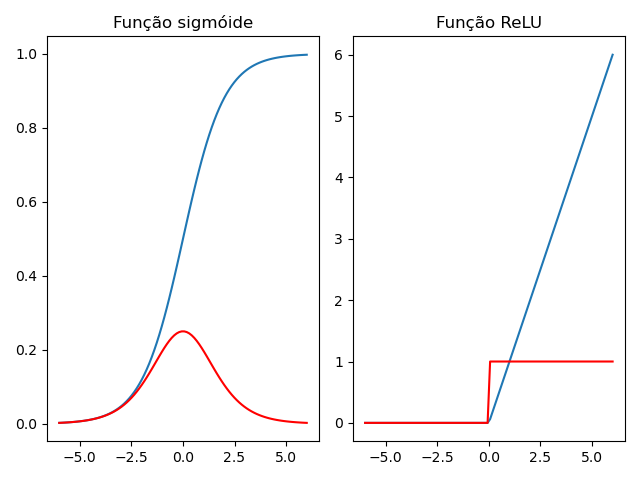

In [10]:
v = np.linspace(-6, 6, 100)

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(v, sigmoid(v))
plt.title('Função sigmóide')

plt.plot(v, sigmoid_deriv(v), 'r')
### plt.axis('equal')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(v, relu(v))
plt.title('Função ReLU')

plt.plot(v, relu_deriv(v), 'r')
### plt.axis('equal')
plt.tight_layout()

plt.show()

### Imprime os pesos iniciais

In [11]:
print('\n=======================================')
print('Inicialização dos pesos')
print('=======================================')
print('W^0:')
print(W_0)
print('\nb^0')
print(b_0)

print('\nW^1')
print(W_1)
print('\nb^1')
print(b_1)


Inicialização dos pesos
W^0:
[[0.1 0.2 0.3]
 [0.3 0.2 0.7]]

b^0
[1.0, 1.0, 1.0]

W^1
[[0.2 0.3]
 [0.3 0.5]
 [0.6 0.4]]

b^1
[1.0, 1.0]


### Obtendo o padrão de entrada

In [12]:
# Épocas: Neste exemplo implementamos uma única época
#         Em um exemplo completo, teriamos um laço de repetição que controla as épocas de treinamento.
# -----
#### for epoch in range(num_epochs):

# Iterações: Neste exemplo implementamos uma única iteração
#            Em um exemplo completo, teriamos um laço de repetição que controla as iterações da época atual.
# -----
    #### X_ = np.random.shuffle(X)
    #### for x in X:
        

# Padrão de entrada.
x = X[0, :]

print('\nx:')
print(x)


x:
[0.1 0.7]


### Etapa de propagação adiante (Forward)

In [13]:
print('\n========================================')
print('Forward...')
print('========================================')

# Camada 0 (camada escondida)
# ----------------------------
print('\n---------------------------------------')
print('Camada 0 (camada escondida):')
print('---------------------------------------')
# Produto interno
v_0 = np.dot(x, W_0) + b_0
print('v^0:')
print(v_0)

# Função de ativação: ReLu
y_0 = relu(v_0)
print('\ny^0:')
print(y_0)

# Camada 1 (camada de saída)
# --------------------------
print('\n---------------------------------------')
print('Camada 1 (camada de saída):')
print('---------------------------------------')
# Produto interno
v_1 = np.dot(y_0, W_1) + b_1
print('v^1:')
print(v_1)

# Função de ativação: softmax
y_1 = softmax(v_1)
print('\ny^1:')
print(y_1)

# Calculo do erro
# ----------------
erro = erro_entropia_cruzada(y_1, y)
print('\nErro: ')
print('---------------------------------------')
print(erro)       


Forward...

---------------------------------------
Camada 0 (camada escondida):
---------------------------------------
v^0:
[1.22 1.16 1.52]

y^0:
[1.22 1.16 1.52]

---------------------------------------
Camada 1 (camada de saída):
---------------------------------------
v^1:
[2.504 2.554]

y^1:
[0.4875026 0.5124974]

Erro: 
---------------------------------------
[[0.31202306 0.31202306]]


## Backward

In [14]:
print('\n========================================')
print('Backward...')
print('========================================')

# ////////////////////////////////////////////////////////////////////////////////
# Camada 1 (camada de saída)
# ////////////////////////////////////////////////////////////////////////////////
print('\n---------------------------------------')
print('Camada 1 (camada de saída):')
print('---------------------------------------')
# --------------------------------------------------------------------------------
# ∂E/∂W^1 = ∂E/∂y^2 * ∂y^2/∂v^2 * ∂v^2/∂W^2
# --------------------------------------------------------------------------------
print('\n∂E/∂W^1 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^2/∂W^1')
print('-----------------------------------------')

# ∂E/∂y^1
dE_dy_1 = erro_entropia_cruzada_deriv(y_1, y)
print('\n∂E/∂y^1:')
print(dE_dy_1)

# ∂y^1/∂v^1
dy_1_dv_1 = softmax_deriv(v_1)
print('\n∂y^1/∂v^1:')
print(dy_1_dv_1)

# ∂v^1/∂W^1
dv_1_dW_1 = np.ones(W_1.shape) * y_0[..., np.newaxis]
print('\n∂v^2/∂W^1:')
print(dv_1_dW_1)

# ∂E/∂W^1:
# -------- 
dE_dW_1 = dE_dy_1 * dy_1_dv_1 * dv_1_dW_1
print('\n∂E/∂W^1:')
print('--------')
print(dE_dW_1)

# Atualização dos pesos da camada 1 (W^1):
# ---------------------------------------
W_1 = W_1 - learning_rate * dE_dW_1
print('\nW\'^1 = W^1(t - 1) - η * ∂E/∂W^1')
print(W_1)

# ////////////////////////////////////////////////////////////////////////////////
# Camada 0 (camada escondida):
# ////////////////////////////////////////////////////////////////////////////////
print('\n---------------------------------------')
print('Camada 0 (camada escondida):')
print('---------------------------------------')
# --------------------------------------------------------------------------------
# ∂E^total/∂W^0 = ∂E^total/∂y^0 * ∂y^0\∂v^0 * ∂y^0/∂W^0
# --------------------------------------------------------------------------------
print('\n∂E^total/∂W^0 = ∂E^total/∂y^0 * ∂y^0\∂v^0 * ∂y^0/∂W^0')
print('-----------------------------------------------------')

# ∂y^0/∂v^0
dy_0_dv_0 = relu_deriv(v_0)
print('\n∂y^0/∂v^0:')
print(dy_0_dv_0)

# ∂v^0/∂W^0
dv_0_dW_0 = np.ones(W_0.shape) * x[..., np.newaxis]
print('\n∂v^0/∂W^0:')
print(dv_0_dW_0)

# ∂E^total/∂y^0 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^1/∂y^0
# -----------------------------------------------
# ∂E/∂y^1 : Já calculado
# ∂y^1/∂v^1 : Já calculado
# ∂v^1/∂y^0 : Calcular!!!
# -----------------------------------------------
print('\n∂E^total/∂y^0 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^1/∂y^0')
print('- - - - - - - - - - - - - - - - - - - - - - - -')

# Print
print('\ndE_dy^1: (já calculado anteriormente)')
print(dE_dy_1)

# Print
print('\ndy^1_dv^1: (já calculado anteriormente)')
print(dy_1_dv_1)

# ∂v^1/∂y^0
dv_1_dy_0 = W_1
print('\n∂v^1/∂y^0:')
print(dv_1_dy_0)

# ∂E^total/∂y^0
dE_total_dy_0 = dE_dy_1 * dy_1_dv_1 * dv_1_dy_0
print(dE_total_dy_0)
dE_total_dy_0 = dE_total_dy_0.sum(axis=1)
print('\n∂E^total/∂y^0:')
print('- - - - - - - -')
print(dE_total_dy_0)

# ∂E^total/∂W^0 = ∂E^total/∂y^0 * ∂y^0\∂v^0 * ∂y^0/∂W^0
# -----------------------------------------------------
dE_total_dW_0 = dE_total_dy_0 * dy_0_dv_0 * dv_0_dW_0
print('\n∂E^total/∂W^0:')
print('--------------')
print(dE_total_dW_0)

# Atualização dos pesos da camada 0 (W^0):
# ----------------------------------------
W_0 = W_0 - learning_rate * dE_total_dW_0
print('\nW\'^0 = W^0 - η * ∂E^total/∂W^0:')
print(W_0)


Backward...

---------------------------------------
Camada 1 (camada de saída):
---------------------------------------

∂E/∂W^1 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^2/∂W^1
-----------------------------------------

∂E/∂y^1:
[[-2.0512711 -2.0512711]]

∂y^1/∂v^1:
[0.24984382 0.24984382]

∂v^2/∂W^1:
[[1.22 1.22]
 [1.16 1.16]
 [1.52 1.52]]

∂E/∂W^1:
--------
[[-0.62524682 -0.62524682]
 [-0.59449698 -0.59449698]
 [-0.77899604 -0.77899604]]

W'^1 = W^1(t - 1) - η * ∂E/∂W^1
[[0.20625247 0.30625247]
 [0.30594497 0.50594497]
 [0.60778996 0.40778996]]

---------------------------------------
Camada 0 (camada escondida):
---------------------------------------

∂E^total/∂W^0 = ∂E^total/∂y^0 * ∂y^0\∂v^0 * ∂y^0/∂W^0
-----------------------------------------------------

∂y^0/∂v^0:
[1. 1. 1.]

∂v^0/∂W^0:
[[0.1 0.1 0.1]
 [0.7 0.7 0.7]]

∂E^total/∂y^0 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^1/∂y^0
- - - - - - - - - - - - - - - - - - - - - - - -

dE_dy^1: (já calculado anteriormente)
[[-2.0512711 -2.0512711]]

dy^1_dv^1: 

## Referencias
---
* [1]  Back-Propagation is very simple. Who made it Complicated ?
    * https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c 
* Chapter 7 : Artificial neural networks with Math.
    * https://medium.com/deep-math-machine-learning-ai/chapter-7-artificial-neural-networks-with-math-bb711169481b
* The Matrix Calculus You Need For Deep Learning
    * http://explained.ai/matrix-calculus/index.html 
* How backpropagation works, and how you can use Python to build a neural network
    * https://medium.freecodecamp.org/build-a-flexible-neural-network-with-backpropagation-in-python-acffeb7846d0 
* All the Backpropagation derivatives
    * https://medium.com/@pdquant/all-the-backpropagation-derivatives-d5275f727f60![image.png](attachment:image.png)